In [104]:
import pandas as pd
import numpy as np

In [105]:
soil_df=pd.read_csv("drive/MyDrive/soill.csv")

In [106]:
soil_df.head()

,savi,smi,bsi,ndsi,msi
0,0.190617,0.145935,18410.73438,-0.145935,0.745300
1,0.258367,0.134160,20694.74805,-0.134160,0.763419
2,0.071366,0.173132,14935.70508,-0.173132,0.704838
3,0.257463,0.173497,19764.69141,-0.173497,0.704308
4,0.299651,0.078491,23700.82617,-0.078491,0.854443


In [107]:
soil_df.loc[soil_df['smi'] <=0.06, 'soiltype']='dry'
soil_df.loc[soil_df['smi'] >=0.06, 'soiltype'] = 'wet'


In [108]:
soil_df

,savi,smi,bsi,ndsi,msi,soiltype
0,0.190617,0.145935,18410.73438,-0.145935,0.745300,wet
1,0.258367,0.134160,20694.74805,-0.134160,0.763419,wet
2,0.071366,0.173132,14935.70508,-0.173132,0.704838,wet
3,0.257463,0.173497,19764.69141,-0.173497,0.704308,wet
4,0.299651,0.078491,23700.82617,-0.078491,0.854443,wet
...,...,...,...,...,...,...
1048570,0.403777,0.176036,22945.87305,-0.176036,0.700629,wet
1048571,0.378985,0.171807,22845.81250,-0.171807,0.706765,wet
1048572,0.337689,0.149431,22957.81250,-0.149431,0.739991,wet
1048573,0.528940,0.239179,25484.98633,-0.239179,0.613971,wet


In [109]:
X=soil_df.drop(['soiltype'],axis=1)

In [110]:
Y=soil_df['soiltype']

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.4,random_state= 3)

In [115]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)
 
# Train the model using the training sets
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [116]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 

 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))

ACCURACY OF THE MODEL:  1.0


In [117]:
pred=pd.DataFrame(y_pred)
pred.head()

,0
0,dry
1,dry
2,dry
3,wet
4,dry


In [118]:
pred.value_counts()

wet    241449
dry    177981
dtype: int64

In [119]:
pred.set_index(0)

""
0
dry
dry
dry
wet
dry
...
dry
wet
dry


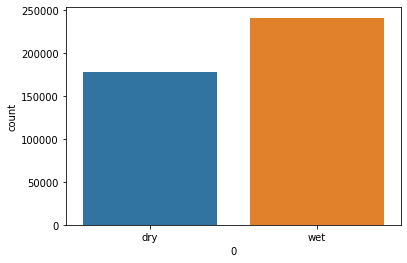

In [120]:
import seaborn as sns
sns.countplot(data=pred,x=0)

In [17]:
Train_Accuracy = metrics.accuracy_score(Y_train, clf.predict(X_train))
Test_Accuracy= metrics.accuracy_score(Y_test, y_pred)

In [18]:
Train_Accuracy

1.0

In [19]:
Test_Accuracy

1.0

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
test=pd.read_csv("drive/MyDrive/puruli.csv")

In [121]:
test.loc[soil_df['smi'] <=0.14, 'soiltype']='dry'
test.loc[soil_df['smi'] >=0.14, 'soiltype'] = 'wet'


In [78]:
row=pd.DataFrame(test['soiltype'])

In [49]:
row.reshape(-1,1)

AttributeError: ignored

In [79]:

row.replace("dry", 
           "0",
           inplace=True)

row.replace("wet", 
           "1",
           inplace=True)
row

,soiltype
0,1
1,1
2,1
3,1
4,1
...,...
2029,0
2030,0
2031,0
2032,0


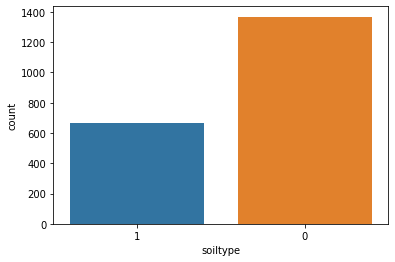

In [80]:
sns.countplot(data=row,x='soiltype')

In [84]:
#row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
yhat = clf.predict(test)
print('Predicted Class: %d' % yhat[0])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- soiltype
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [81]:
row_df=np.array(row)

In [82]:
x=row_df.reshape(-1,1)

In [56]:
row_df

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [59]:
row_dff=np.array(row_df)
row_dff

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [123]:
Y_train=soil_df['soiltype']
X_train=soil_df.drop(['soiltype'],axis=1)
X_test=test.drop(['soiltype'],axis=1)
Y_test=test['soiltype']

In [126]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
classifier.fit(X_train, Y_train)
 
# performing predictions on the test dataset
y_prd = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 

 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_prd))

ACCURACY OF THE MODEL:  0.6563421828908554


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [125]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
classifier = RandomForestClassifier(n_estimators = 100)
 
# Train the model using the training sets
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [128]:
df=pd.DataFrame(y_prd)

In [129]:
df.value_counts()

dry    1382
wet     652
dtype: int64

In [130]:
df.set_index(0)

""
0
wet
wet
dry
dry
dry
...
wet
wet
wet


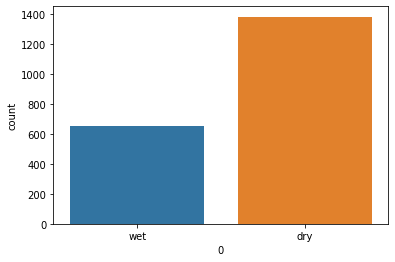

In [131]:
sns.countplot(data=df,x=0)